<a href="https://colab.research.google.com/github/paolaportilloj/Visualizaci-n-de-datos-para-la-toma-de-decisiones/blob/main/Copia_de_Avancespbhoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **¿Como piensan los alumnos del Tecnológico de Monterrey?**




Paola Portillo Jiménez A01620499

Se generó una encuesta a diversos estudiantes del Tec en donde cuentan con una carrera, edad y semestre diferente. Se recolectó información acerca de sus gustos e información personal. Se espera que por medio de la base de datos se puedan llegar a diferentes conclusiones en donde se puedan encontrar similitud entre los alumnos.

**Descripción de las variables**

**Categóricas**

1. Nombre completo: nombre del estudiante
2. Tec: Si son alumnos del Tecnológico de Monterrey
3. Semestre: en el semestre que estan actualmente
4. Carrera: cual carrera estan cursando
5. Género: si es hombre o mujer
6. Comida: describe la comida favorita del estudiante
7. Mejor superbowl en los últimos 5 años: cual consideran que ha sido el mejor show en el medio tiempo del Superbowl en los últimos 5 años.
8. Personaje favorito de Friends: Cual es su personaje favorito de la serie de Friends
9. Deporte: el deporte favorito 
10. Serie: su serie favorita 
11. Reggaetonero favorito:artista favorito del genero de reggaton
12. Personaje Favorito de Avengers: personaje favorito de Marvel
13. Cantante favorito mexicano: cantante favorito de México
14. Genero de música: su genero de música favorito
15. Equipo favorito mexicano de fútbol: equipo de fútbol mexicano favorito
16. Tienes novi@: si en este momento tienen novio o novia
17. Foráneo: si es foráneo o es de Monterrey
18. Pariente Favorito: con cual de sus parientes tiene una mayor conexión
19. Color Favorito: el color favorito de cada persona
20. Religión: el tipo de religión 
21. Quién es mejor: si el jugador Messi es mejor jugador que Cristiano


**Numéricas**
1. Edad: cuantos años tienen
2. Cuántos hermanos tienes: los hermanos con los que cuentan
3. Cuántos idiomas sabes hablar: los idiomas que saben hablar, contando con el nativo
4. Cuántas mascotas tienes: las mascotas que tienen, incluyendo en la casa de sus padres (si es que son foráneos)






In [6]:
path='/content/drive/MyDrive/5to semestre/1er periodo/Visualización de datos para la toma de decisiones/Base de datos de estudiantes TEC.xlsx'

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [8]:
df = pd.read_excel(path)

In [9]:
cols=df.columns

In [10]:
df.shape

(29, 31)

In [11]:
cols=cols.to_list()

In [12]:
df.index = df.index + 1

### **¿Cuántos hombres y mujeres hay en la base de datos?**

In [13]:
countsDF = pd.pivot_table(data=df,
               index='Genero',
               values='Quién es mejor',
               aggfunc='count',
               )


In [14]:
countsDF=countsDF.rename({'Quién es mejor':'Hombres VS. Mujeres'},
                     axis=1)
countsDF

,Hombres VS. Mujeres
Genero,
Hombre,17
Mujer,12


In [15]:
countsDF.reset_index(inplace=True)

In [16]:
t=countsDF.loc[:,'Hombres VS. Mujeres'].sum()

In [17]:
countsDF['%']=countsDF.loc[:,'Hombres VS. Mujeres']

In [18]:
countsDF.columns

Index(['Genero', 'Hombres VS. Mujeres', '%'], dtype='object')

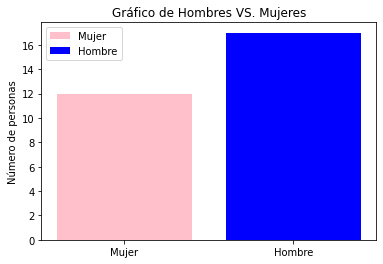

In [19]:
x1 = ['Mujer']
y1 = [12]

x2 = ['Hombre']
y2 = [17]


plt.bar(x1, y1, label="Mujer", color='pink')
plt.bar(x2, y2, label="Hombre", color='b')
plt.plot()


plt.ylabel("Número de personas")
plt.title("Gráfico de Hombres VS. Mujeres")
plt.legend()
plt.show()

### **¿Exiten hombres y mujeres que estudian lo mismo y tienen la misma edad?**


In [20]:
c=pd.pivot_table(data=df,
                 index= ['Edad','Genero','Carrera '],
                 aggfunc='count',
                 values='Quién es mejor'
)
c=c.rename({'Quién es mejor':'Genero '},
                     axis=1)


In [21]:
c=c.reset_index()

In [22]:
fig=px.sunburst(c,
                path=['Genero','Edad', 'Carrera '],
                values='Genero '
                )
fig.show()

### **¿Cuántos foráneos hay?**

In [23]:
counts = pd.pivot_table(data=df,
               index='Foráneo',
               values='Quién es mejor',
               aggfunc='count',
               )
counts=counts.rename({'Quién es mejor':'Foreános VS Regios'},
                     axis=1)
counts

,Foreános VS Regios
Foráneo,
No,9
Si,20


In [24]:
counts.reset_index(inplace=True)

**Porcentaje de foráneos y regios**


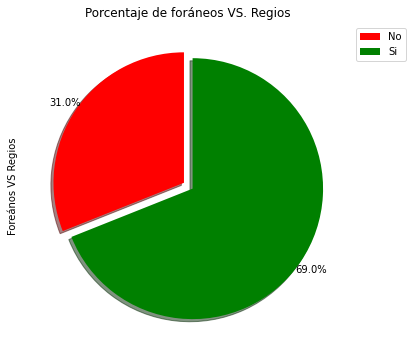

In [25]:
cols=['red', 'green']
explode_dis=[0.04,0.04]
counts['Foreános VS Regios'].plot(kind='pie',
                        figsize=(15,6),
                        startangle=90,
                        labels=None,
                        autopct='%1.1f%%',
                        pctdistance=1.1,
                        colors=cols,
                        explode=explode_dis,
                        shadow=True,
)
plt.title('Porcentaje de foráneos VS. Regios')
plt.legend(labels=counts.Foráneo,
           bbox_to_anchor=(1,1)
            );

In [27]:
counts

,Foráneo,Foreános VS Regios
0,No,9
1,Si,20


ValueError: ignored

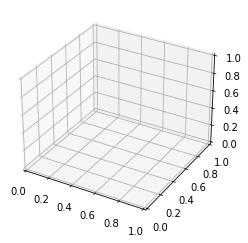

In [40]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = np.random.randint(10, size=10)
z = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [20, 9]

ax.bar3d(x, y, z, dx, dy, dz, color='g')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Bar Chart Example")
plt.tight_layout()
plt.show()

### **¿Los foráneos tienen menor promedio?**

In [ ]:
f=pd.pivot_table(data=df,
                 index= ['Foráneo'],
                 #aggfunc='count',
                 values='Promedio global'
)
#f=f.rename({'Quién es mejor':'Foraneo '},
                     #axis=1)

In [ ]:
f.reset_index(inplace=True)

In [ ]:
f

In [ ]:
r=f.loc[:,'Foraneo '].sum()

In [ ]:
f['%']=f.loc[:,'Foraneo ']

In [ ]:
f

In [ ]:
df1.groupby(['23. Color Favorito','6. Sexo','8. Mejor superbowl en los últimos 5 años']).size()

¿Cuántos hombres que piensan que juega mejor Messi le van a rayados?

In [ ]:
df = df.reset_index()

In [ ]:
df.index = df.index + 1

In [ ]:
df2 = df[['25. ¿Quién es mejor?','6. Sexo','16. Equipo favorito mexicano de fútbol']]
df2 = df2.set_index(['25. ¿Quién es mejor?','6. Sexo','16. Equipo favorito mexicano de fútbol'])
df2.loc['Messi','Hombre', 'Rayados']

In [ ]:
df2.groupby(['25. ¿Quién es mejor?','6. Sexo','16. Equipo favorito mexicano de fútbol']).size()